In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json

In [4]:
# with open('./data/sio-db-prod.users.json') as j:
#     events = json.load(j)
    
# dailies = {}

# for event in events:
#     if len(event['events']) == 0:
#         continue
    
#     for e in event['events']:
#         for tab in e['tabs']:
#             tasks = tab['tasks']
#             for task in tasks:
#                 dailies[task['_id']['$oid']] = task['task_name']
                
# with open("data/task_data.json", "w") as f:
#     json.dump(dailies, f)
    
    
    
task_data = json.load(open('data/task_data.json'))

In [117]:
df = pd.read_csv('data/data.csv')
df['target'].fillna("end", inplace=True)
df_all = df.groupby(['source', 'target'])['weight'].sum().reset_index(name='weight')
df_all.sample(10)

,source,target,weight
52,LevelDown,FirstPurchase,2
1,ChapterPack,FirstPurchase,4
22,DailyReward,Mission,472
71,Mission,RewardPatrol,2845
73,Mission,Starter Pack,5
89,QuickPatrol,TrialReward,55
53,LevelDown,LevelDown,735
95,ResourceShop,FirstPurchase,5
62,Mission,ChestItem,6160
60,LevelDown,end,99


In [118]:
G = nx.from_pandas_edgelist(df_all, 'source', 'target', edge_attr="weight", create_using=nx.Graph())

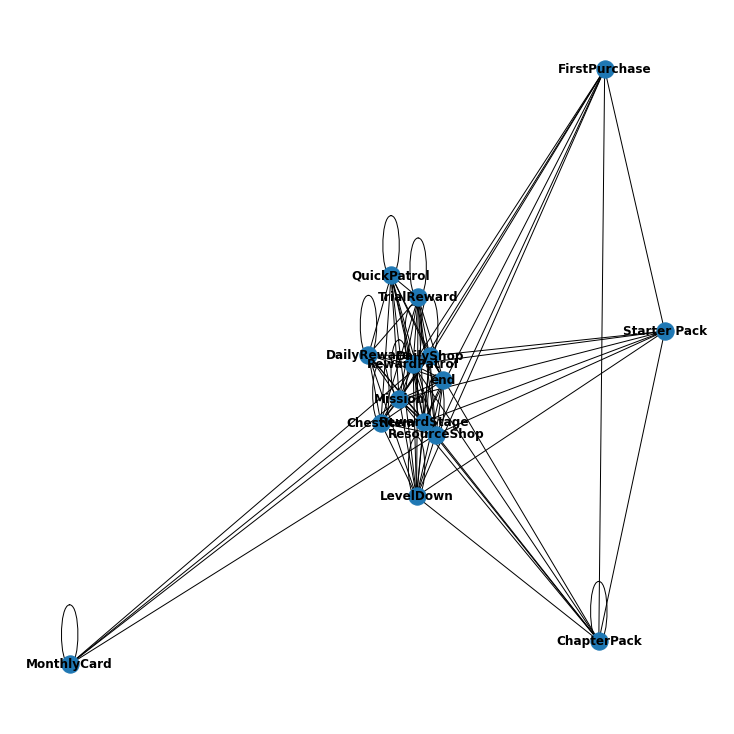

In [119]:
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [120]:
def find_selfloop_nodes(G):
    """
    Find selfloop nodes in a graph.
    """
    nodes_with_selfloops = []
    
    # for node in G.nodes():
    #     if node in G.neighbors(node):
    #         nodes_with_selfloops.append(node)
    
    
    for u, v in G.edges():
        if u == v:
            nodes_with_selfloops.append(u)

    return nodes_with_selfloops 

assert len(list(nx.selfloop_edges(G))) == len(find_selfloop_nodes(G))

c:\Python310\lib\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


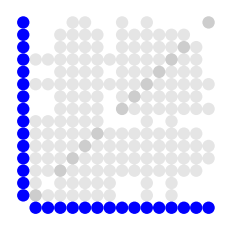

In [121]:
import nxviz as nv

ap = nv.MatrixPlot(G)
plt.show()

In [122]:
def count_nodes_neighbor(G):
    nodes_list = {}
    
    for node in G.nodes():
        nodes_list[node] = len(list(G.neighbors(node)))
    
    return nodes_list

In [123]:
nodes_list = count_nodes_neighbor(G)
nodes_list

{'ChapterPack': 9,
 'FirstPurchase': 8,
 'LevelDown': 14,
 'Mission': 15,
 'ResourceShop': 15,
 'RewardPatrol': 14,
 'Starter Pack': 8,
 'ChestItem': 12,
 'DailyReward': 11,
 'DailyShop': 15,
 'QuickPatrol': 11,
 'RewardStage': 14,
 'TrialReward': 11,
 'end': 10,
 'MonthlyCard': 5}

In [124]:

degree_cent = nx.degree_centrality(G)
degree_cent

{'ChapterPack': 0.7142857142857142,
 'FirstPurchase': 0.5714285714285714,
 'LevelDown': 1.0714285714285714,
 'Mission': 1.1428571428571428,
 'ResourceShop': 1.1428571428571428,
 'RewardPatrol': 1.0714285714285714,
 'Starter Pack': 0.5714285714285714,
 'ChestItem': 0.9285714285714285,
 'DailyReward': 0.8571428571428571,
 'DailyShop': 1.1428571428571428,
 'QuickPatrol': 0.8571428571428571,
 'RewardStage': 1.0714285714285714,
 'TrialReward': 0.8571428571428571,
 'end': 0.7142857142857142,
 'MonthlyCard': 0.42857142857142855}

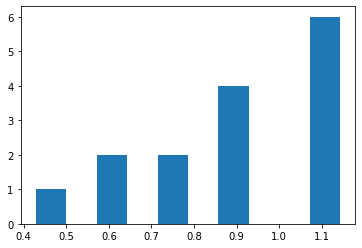

In [125]:
# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(degree_cent.values()))
plt.show()

In [126]:
betweeness_cent = nx.betweenness_centrality(G)
betweeness_cent

{'ChapterPack': 0.0,
 'FirstPurchase': 0.0,
 'LevelDown': 0.027472527472527476,
 'Mission': 0.057692307692307696,
 'ResourceShop': 0.057692307692307696,
 'RewardPatrol': 0.027472527472527476,
 'Starter Pack': 0.0,
 'ChestItem': 0.019230769230769232,
 'DailyReward': 0.0,
 'DailyShop': 0.057692307692307696,
 'QuickPatrol': 0.0,
 'RewardStage': 0.027472527472527476,
 'TrialReward': 0.0,
 'end': 0.0,
 'MonthlyCard': 0.0}

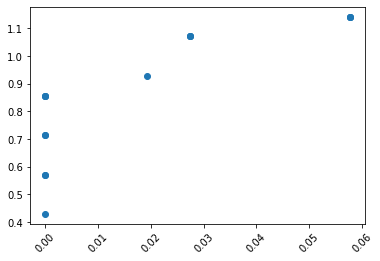

In [127]:
# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(betweeness_cent.values()), list(degree_cent.values()))

# Display the plot
# plt.xlim(-0.00005, 0.0002)
plt.xticks(rotation=45)
plt.show()

In [128]:
sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)

[('Mission', 1.1428571428571428),
 ('ResourceShop', 1.1428571428571428),
 ('DailyShop', 1.1428571428571428),
 ('LevelDown', 1.0714285714285714),
 ('RewardPatrol', 1.0714285714285714),
 ('RewardStage', 1.0714285714285714),
 ('ChestItem', 0.9285714285714285),
 ('DailyReward', 0.8571428571428571),
 ('QuickPatrol', 0.8571428571428571),
 ('TrialReward', 0.8571428571428571),
 ('ChapterPack', 0.7142857142857142),
 ('end', 0.7142857142857142),
 ('FirstPurchase', 0.5714285714285714),
 ('Starter Pack', 0.5714285714285714),
 ('MonthlyCard', 0.42857142857142855)]

In [129]:
def weighted_degree(G, weight):
    result = dict()
    for node in G.nodes():
        weighted_degree = 0
        for n in G.edges([node], data=True):
            weighted_degree += n[2][weight]
        result[node] = weighted_degree
    return result

degree_weighted = weighted_degree(G, 'weight')
sorted(degree_weighted.items(), key=lambda x: x[1], reverse=True)

[('Mission', 64010),
 ('RewardPatrol', 27196),
 ('RewardStage', 14126),
 ('ChestItem', 10521),
 ('DailyShop', 9838),
 ('ResourceShop', 7237),
 ('end', 4595),
 ('TrialReward', 3507),
 ('DailyReward', 2937),
 ('LevelDown', 2567),
 ('QuickPatrol', 1726),
 ('ChapterPack', 32),
 ('FirstPurchase', 22),
 ('Starter Pack', 17),
 ('MonthlyCard', 7)]

In [130]:
page_rank = nx.pagerank(G, weight='weight')
sorted(page_rank.items(), key=lambda x: x[1], reverse=True)

[('Mission', 0.30685529700918324),
 ('RewardPatrol', 0.18229817936882692),
 ('RewardStage', 0.10170573024335433),
 ('DailyShop', 0.07706830597221301),
 ('ResourceShop', 0.06571324014922245),
 ('ChestItem', 0.06121851260025779),
 ('end', 0.039438926325588736),
 ('TrialReward', 0.03212825314231255),
 ('LevelDown', 0.031164279081948475),
 ('DailyReward', 0.03023233984816575),
 ('QuickPatrol', 0.022215624077109808),
 ('ChapterPack', 0.013675244154774262),
 ('MonthlyCard', 0.01324383122430502),
 ('FirstPurchase', 0.012116113784283416),
 ('Starter Pack', 0.01092612301845447)]

In [131]:
df_1000000 = df[df['stage']==1000000].groupby(['source', 'target'])['weight'].sum().reset_index(name='weight')
stage_1 = nx.from_pandas_edgelist(df_1000000, 'source', 'target', edge_attr="weight", create_using=nx.Graph())

df_1000001 = df[df['stage']==1000001].groupby(['source', 'target'])['weight'].sum().reset_index(name='weight')
stage_2 = nx.from_pandas_edgelist(df_1000001, 'source', 'target', edge_attr="weight", create_using=nx.Graph())

df_1000002 = df[df['stage']==1000002].groupby(['source', 'target'])['weight'].sum().reset_index(name='weight')
stage_3 = nx.from_pandas_edgelist(df_1000002, 'source', 'target', edge_attr="weight", create_using=nx.Graph())


In [132]:
stages = [stage_1, stage_2, stage_3]
evol = [nx.degree_centrality(stage) for stage in stages]
evol_df = pd.DataFrame.from_records(evol).fillna(0)

<AxesSubplot:>

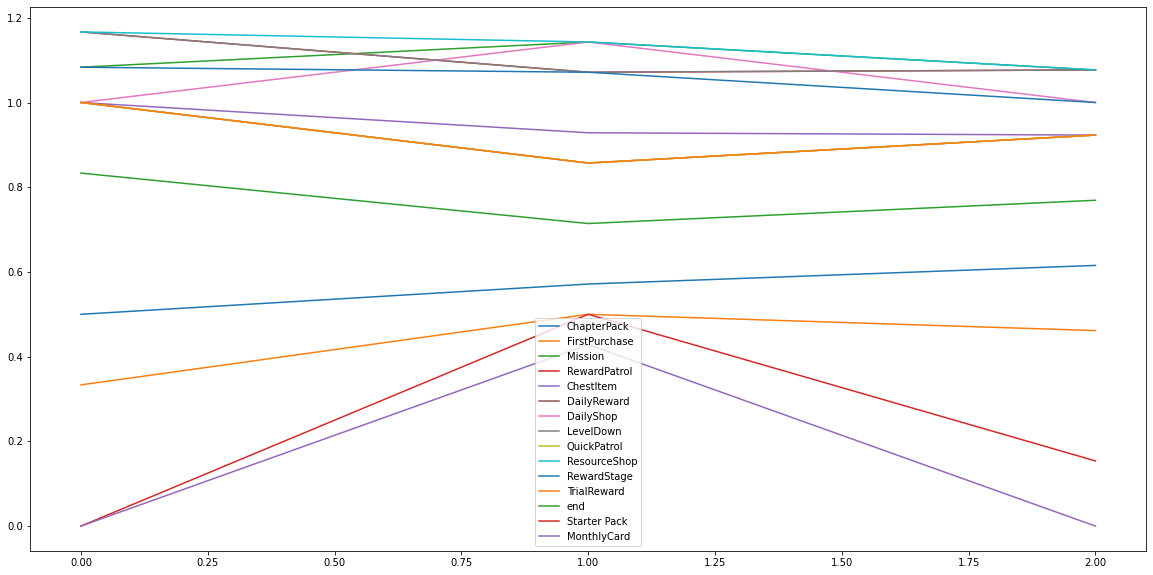

In [133]:
evol_df.plot(figsize=(20,10))

<AxesSubplot:>

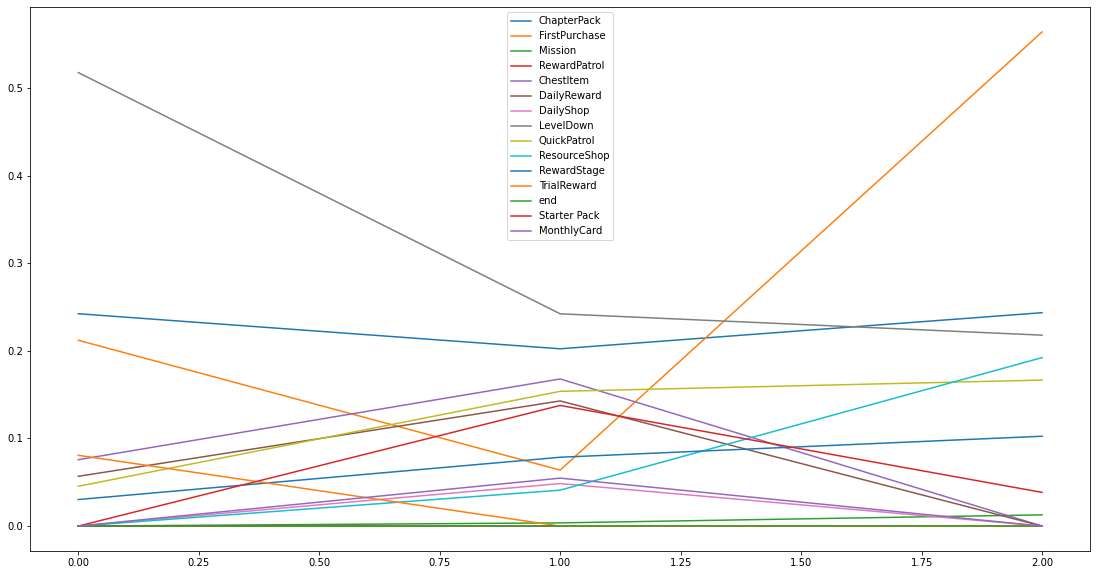

In [134]:
evol = [nx.betweenness_centrality(graph, weight='weight') for graph in stages]
evol_df = pd.DataFrame.from_records(evol).fillna(0)

evol_df.plot(figsize=(19,10))

In [2]:
df_source_id = pd.read_csv('data/source_id_2.csv')
df_source_id['target'].fillna("end", inplace=True)

In [34]:
df_source_id['new_source'] = df_source_id['source'].apply(lambda x: task_data.get(x.split('_')[-1]) if task_data.get(x.split('_')[-1]) else x)
df_source_id['new_target'] = df_source_id['target'].apply(lambda x: task_data.get(x.split('_')[-1]) if task_data.get(x.split('_')[-1]) else x)

graph_data = df_source_id.groupby(['new_source', 'new_target']).agg(
    weight = ('count', 'sum'),
    total_time = ('time', 'sum'),
    avg_time = ('avg_time', 'mean')
).reset_index()

source_id = nx.from_pandas_edgelist(
    graph_data, 
    'new_source', 
    'new_target', 
    edge_attr=['weight', 'total_time', 'avg_time'], 
    create_using=nx.Graph()
)
source_id.remove_edges_from(nx.selfloop_edges(source_id))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

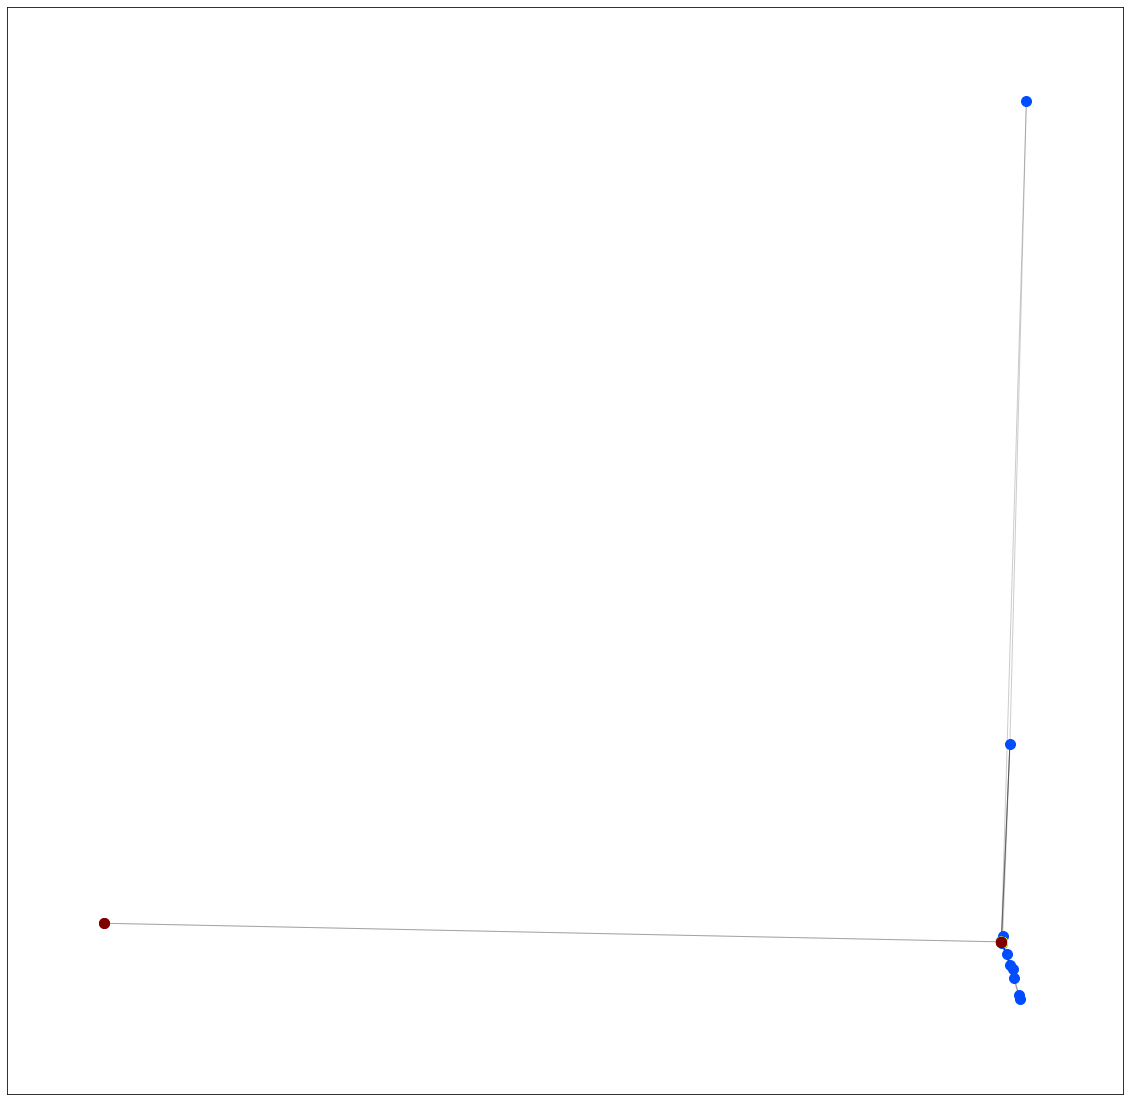

In [35]:
import community.community_louvain as community
import numpy as np
from matplotlib import cm

plt.figure(figsize=(20, 20))
partition = community.best_partition(source_id)
size = len(set(partition.values()))
pos = nx.spectral_layout(source_id)

count = 0
colors = [cm.jet(x) for x in np.linspace(0, 1, size)]

for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(source_id, pos, list_nodes, node_size = 100, node_color = colors[count])
    count += 1

nx.draw_networkx_edges(source_id, pos, alpha=0.2)
plt.show()

In [27]:
d = {}
for feature, par in partition.items():
    if par in d:
        d[par].append(feature)
    else:
        d[par] = [feature]
d

{0: ['BUY_ENERGY',
  'GOLD_PACK',
  'Login for 1d',
  'OPEN_CRATE',
  'PURCHASE_GOLD',
  'STAGE_REWARD',
  'STAGE_STEP_REWARD',
  'end',
  'CHAPTER_PACK'],
 1: ['Clear Main Chapter 2',
  'DAILY_MILESTONE',
  'DAILY_SHOP',
  'FIRST_TIME_IAP',
  'GEM_PACK',
  'GROWTH_FUNDS',
  'Login for 2d',
  'Login for 6d',
  'Login for total of 3 days',
  'MERGE_EQUIPMENT',
  'Merge equipment 10 time(s)',
  'PATROL_EARNING',
  'QUICK_EARNING',
  'STAGE_CLEAR_REWARD',
  'TRIALS',
  'Complete 1 key evolutions',
  'Defeat total of 100000 monster(s)',
  'Login for 4d',
  'PURCHASE_EQUIPMENT',
  'Reach Lv.10 for all equipment',
  'Obtain total of 500000 Gold',
  'Login for 7d',
  'Obtain total of 800000 Gold',
  'Reach 200000 total monster kills',
  'Equip 1 Lv.25 eqpt',
  'STARTER_PACK',
  'LEVEL_DOWN_EQUIPMENT',
  'Reach Lv.20',
  'Wear full Lv.18+ eqpt',
  'Wear full Lv.20+ eqpt'],
 2: ['Clear Main Stage Chapter 1 ',
  'Get total of 50000 gold from Patrol',
  'Purchase Energy 5 time(s)',
  'Reach Lv.10

In [28]:
source_id.edges(data=True)
for source, target, data in source_id.edges(data=True):
    if target == 'DAILY_MONTHLY_CARD':
        print(source, data)

OPEN_CRATE {'weight': 1, 'total_time': 158.0, 'avg_time': 158.0}


In [ ]:
for d_li in d:
    plt.figure(d_li, figsize=(20, 20))
    nx.draw(nx.subgraph(source_id, d[d_li]), with_labels=True)
    print(nx.density(nx.subgraph(source_id, d[d_li]))/nx.density(source_id))
    page_rank = nx.pagerank(nx.subgraph(source_id, d[d_li]), weight='weight')
    print(sorted(page_rank.items(), key=lambda x: x[1], reverse=True))
    plt.show()

In [42]:
max_d = {}
degree_source_id = nx.pagerank(source_id)

for group in d:
    temp = 0
    for source in d[group]:
        if degree_source_id[source] > temp:
            temp = degree_source_id[source]
            max_d[group] = source

max_d

{0: 'STAGE_REWARD',
 1: 'PATROL_EARNING',
 2: 'Get Normal equipment',
 3: 'Obtain total of 200000 Gold',
 4: 'Reach Lv.3',
 5: 'Obtain total of 50000 Gold'}

In [52]:
nx.transitivity(source_id)

0.6553366073075808

In [54]:
source_id_directed = nx.from_pandas_edgelist(
    graph_data, 
    'new_source', 
    'new_target', 
    edge_attr=['weight', 'total_time', 'avg_time'], 
    create_using=nx.DiGraph()
)

# for path in nx.all_simple_paths(source_id_directed, 'Login for 1d', 'FIRST_TIME_IAP', cutoff=3):
#     print(path)
print(nx.shortest_path(source_id_directed, 'Login for 1d', 'STARTER_PACK', 'avg_time'))
print(len(nx.shortest_path(source_id_directed, 'Login for 1d', 'STARTER_PACK', 'avg_time')))
print(nx.shortest_path_length(source_id_directed, 'Login for 1d', 'STARTER_PACK', 'avg_time'))

['Login for 1d', 'Clear Main Chapter 2', 'Login for total of 3 days', 'Get total of 10  equipment pieces', 'STARTER_PACK']
5


ValueError: ('Contradictory paths found:', 'negative weights?')